In [9]:
import tensorflow as tf

In [10]:
dataset = tf.data.Dataset.load("dataset")

dataset = dataset.batch(10).prefetch(1)


In [11]:
"0.4879807692307692 0.47115384615384615 0.042067307692307696 0.23798076923076922"

'0.4879807692307692 0.47115384615384615 0.042067307692307696 0.23798076923076922'

In [12]:
metrics = tf.keras.metrics.MeanIoU(num_classes=4)
early_stop = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",input_shape=(416,416,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(512,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(4,kernel_size=(13,13),strides=(1,1),padding="valid")
])

model.compile(optimizer="adam",loss="mse",metrics=[metrics])

model.fit(dataset, epochs=100,callbacks=[early_stop])



Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 61s 423ms/step - loss: 73.2482 - mean_io_u_2: 0.1264
Epoch 2/100


/home/lucas/Área de Trabalho/curso_tensorflow/venv/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_io_u_2
  current = self.get_monitor_value(logs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 27s 305ms/step - loss: 78.8740 - mean_io_u_2: 0.0966
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 311ms/step - loss: 25.2982 - mean_io_u_2: 0.1099
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 315ms/step - loss: 26.7032 - mean_io_u_2: 0.1096
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 317ms/step - loss: 24.3156 - mean_io_u_2: 0.1031
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 315ms/step - loss: 24.5097 - mean_io_u_2: 0.1103
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 312ms/step - loss: 21.3802 - mean_io_u_2: 0.1110
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 315ms/step - loss: 31.6418 - mean_io_u_2: 0.1034
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 309ms/step - loss: 40.2599 - mean_io_u_2: 0.1106
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 27s 305ms/step - loss: 31.8895 - mean_io_u_2: 0.1050
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 27s 305ms/step - loss: 22.9290 - mean_io_u_2: 0.1159
Epoch 12/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 311ms/step - loss: 18.1104 - mean_io_u_2: 0.10

In [13]:
model.save("model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


[[[[0.7655138  0.79801154 0.44850793 0.01535357]]]]


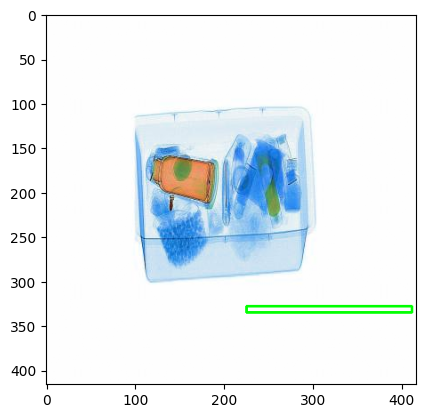

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("imagem_teste.jpg")

image = image.astype("float32") / 255.0
image = np.expand_dims(image, axis=0)

predictions = model.predict(image)
print(predictions)

h_image,w_image= image.shape[1:3]

x,y,w,h = predictions[0][0][0]

x1 = int((x - w / 2)* w_image)
y1 = int((y - h / 2)* h_image)
x2 = int((x + w / 2)* w_image)
y2 = int((y + h / 2)* h_image)



cv2.rectangle(image[0], (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(image[0])